# Week 14 : Case Study 9 - Bimal H M

## Unsupervised Learning - Wine Dataset

### STEP 1 : Importing all Necessary Libraries in to Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q1 : Read the dataset to the python environment

In [2]:
wine = pd.read_csv('Wine.csv')

#### A) Displaying First few Rows

In [3]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### B) Checking Dataset Info

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


#### C) Describing the dataset

In [5]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### D) Normalization

In [6]:
from sklearn import preprocessing

wine1 = preprocessing.normalize(wine)
wine1 = pd.DataFrame(wine1)
wine1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482


### Q2 : Try out different clustering models in the wine dataset.

#### AND

### Q3 : Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

### A - KMeans 

#### Original Dataset

In [7]:
from sklearn.cluster import KMeans

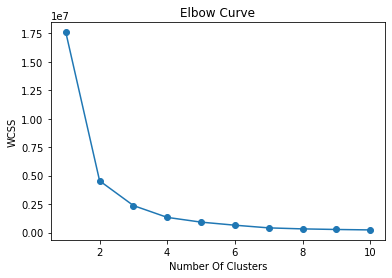

In [8]:
# Elbow Methode
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(wine)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss,'-o')
plt.title("Elbow Curve")
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#KMeans
KMmodel = KMeans(n_clusters = 2)
KMmodel.fit(wine)
pred = KMmodel.fit_predict(wine)
pred_ind = pd.Series(pred)
pred_ind

0      1
1      1
2      1
3      1
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int32

In [10]:
#Silhoutte Score
from sklearn.metrics import silhouette_score

scr = silhouette_score(wine,pred, metric='euclidean')
print('Silhouette Score: %.3f' % scr)

Silhouette Score: 0.657


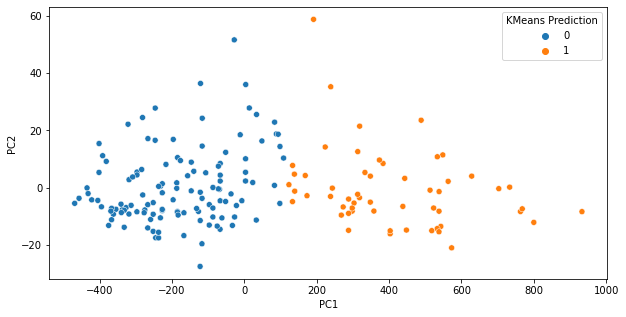

In [11]:
# Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
a = pd.DataFrame(pca.fit_transform(wine), columns=["PC1", "PC2"])
a['KMeans Prediction'] = pred
plt.figure(figsize=(10,5))
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['KMeans Prediction'])
plt.show()

#### Normalied Dataset 

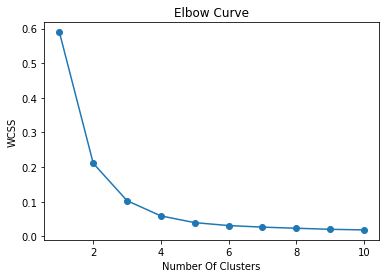

In [12]:
# Elbow Methode
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(wine1)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss,'-o')
plt.title("Elbow Curve")
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#KMeans
KMmodel = KMeans(n_clusters = 3)
KMmodel.fit(wine1)
pred1 = KMmodel.fit_predict(wine1)
pred1_ind = pd.Series(pred1)
pred1_ind

0      2
1      2
2      2
3      2
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int32

In [14]:
#Silhoutte Score

scr1 = silhouette_score(wine1,pred1, metric='euclidean')
print('Silhouette Score: %.3f' % scr1)

Silhouette Score: 0.523


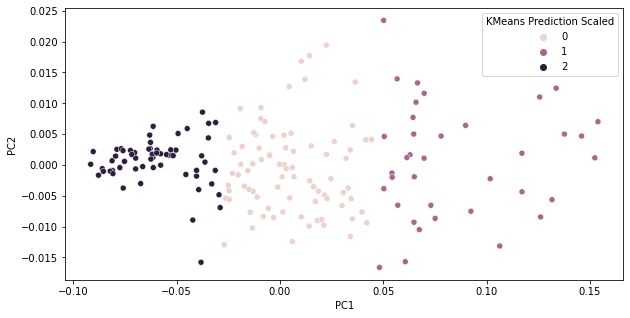

In [15]:
# Visualization

pca = PCA(n_components =2)
a = pd.DataFrame(pca.fit_transform(wine1), columns=["PC1", "PC2"])
a['KMeans Prediction Scaled'] = pred1
plt.figure(figsize=(10,5))
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['KMeans Prediction Scaled'])
plt.show()

### B - HC (Hierarchical clustering)

#### Original Dataset

In [16]:
import scipy.cluster.hierarchy as shc

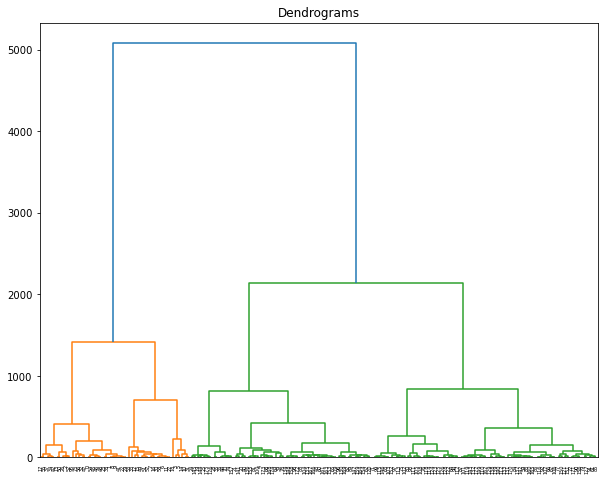

In [17]:
plt.figure(figsize = (10,8))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(wine,method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering as AC

In [19]:
HC = AC(n_clusters = 2,affinity='euclidean',linkage='ward') #From dendrogram Optimum Cluster Number = 2

In [20]:
pred2 = HC.fit_predict(wine)
pred2_ind = pd.Series(pred2)
pred2_ind

0      1
1      1
2      1
3      1
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int64

In [21]:
#Silhoutte Score

scr2 = silhouette_score(wine,pred2, metric='euclidean')
print('Silhouette Score: %.3f' % scr2)

Silhouette Score: 0.659


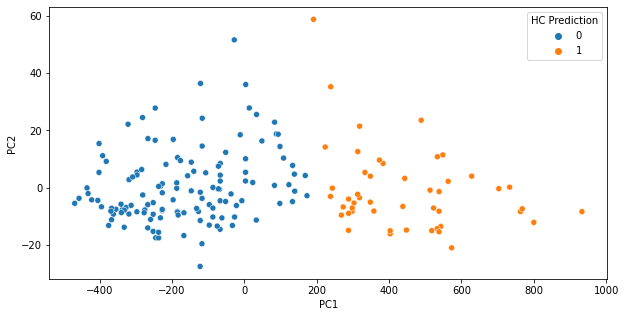

In [22]:
# Visualization

pca = PCA(n_components =2)
a = pd.DataFrame(pca.fit_transform(wine), columns=["PC1", "PC2"])
a['HC Prediction'] = pred2
plt.figure(figsize=(10,5))
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['HC Prediction'])
plt.show()

#### Normalised Dataset

In [23]:
HC1 = AC(n_clusters = 2,affinity='euclidean',linkage='ward')
pred3 = HC.fit_predict(wine1)
pred3_ind = pd.Series(pred3)
pred3_ind

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int64

In [24]:
scr3 = silhouette_score(wine1,pred3, metric='euclidean')
print('Silhouette Score: %.3f' % scr3)

Silhouette Score: 0.537


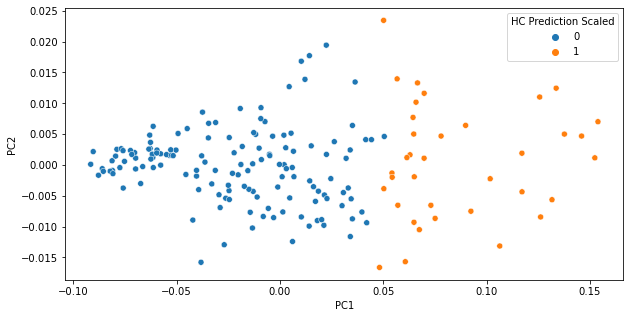

In [25]:
# Visualization

pca = PCA(n_components =2)
a = pd.DataFrame(pca.fit_transform(wine1), columns=["PC1", "PC2"])
a['HC Prediction Scaled'] = pred3
plt.figure(figsize=(10,5))
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['HC Prediction Scaled'])
plt.show()

### Combining Predictions in to Dataset

In [26]:
#Predictions on Orginal Dataset
wine['KMeans Prediction'] = pred_ind
wine['HC Prediction'] = pred2_ind
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans Prediction,HC Prediction
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0


In [27]:
#Predictions on Scaled Dataset
wine1['KMeans Prediction'] = pred1_ind
wine1['HC Prediction'] = pred3_ind
wine1

,0,1,2,3,4,5,6,7,8,9,10,11,12,KMeans Prediction,HC Prediction
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,2,0
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,2,0
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,2,0
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,2,0
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225,0,0
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194,0,0
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336,0,0
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482,0,0
